# **Team Members**

   Level	ID	    Name
    4   20170412	محمد احمد محمد علي
    4	20170396	ماریو عماد كتشنر خیر
    4	20170399	مایكل اسحاق جورجي اسحاق
    4	20170414	محمد أسامة نبوي عاشور
    4	20170446	محمد صلاح عبدالقادر ابراهيم
    4	20170458	محمد عزت محمود عيسي عيد صالح الجمل


# **1-Problem Description**

Language identification (LI) is the problem of determining the natural language that a document or part thereof is written in. Automatic LI has been extensively researched for over fifty years. Today, LI is a key part of many text processing pipelines, as text processing techniques generally assume that the language of the input text is known.
We have obtained the WiLi-2018 Dataset which contains around 250+ languages, we have only worked on 25 language because of the weak resources that we have, and we obtained accuracies along with confusion matrices, all of this is explained in detail below.


# **2-Model design**

We have used the SKLearn library in python to build the model up, we did language modelling using N-Grams, we have used the CountVectorizer to slice the strings up into N-Grams Vector and then use the pipeline architecture to feed the data into the models.

# **3-Experimental results:**

We have used 4 models, each model has proceeded 6 phases, one with the raw string and 5 with the n-grams, we have used the n-grams in the form of 1,2,3,4,5 grams and then classified them accordingly, the models we used were Decision Tree, Random Forest (Ensemble Learning), Logistic Regression (Linear Model), Naïve Bayes (Multinomial), the best model was the Logistic Regression with the accuracy of 98.464% in the n-gram = 3.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix,classification_report

In [3]:
def Model_NGram(model_name,n_gram):

  ngram = (n_gram,n_gram)
  cnt = CountVectorizer(analyzer = 'char',ngram_range=ngram)

  pipeline = Pipeline([
   ('vectorizer',cnt),  
   ('model',model_name())
])  
  return pipeline

# **Working on 25 classes only**

In [4]:
def read_data(classes=None,path=''):
    av = True
    path = path
    if not classes:
        classes = set()
        av = False
    else: 
        classes = classes 
    x_train = []
    y_train = []
    x_test = []
    y_test = []
    
    with open(path + 'x_train.txt','r',encoding="utf8") as xf, open(path + 'y_train.txt','r',encoding="utf8") as yf:
        for x,y in zip(xf, yf):
            if av:
                if y.strip() in classes:
                    x_train.append(x.strip())
                    y_train.append(y.strip())
                else:
                    pass
            else:
                x_train.append(x.strip())
                y_train.append(y.strip())
                classes.add(y.strip())

                

    with open(path + 'x_test.txt','r',encoding="utf8") as xf, open(path + 'y_test.txt','r',encoding="utf8") as yf:
        for x,y in zip(xf, yf):
            if av:
                if y.strip() in classes:
                    x_test.append(x.strip())
                    y_test.append(y.strip())
                else:
                    pass
            else:
                x_test.append(x.strip())
                y_test.append(y.strip())
                classes.add(y.strip())
    return x_train,y_train,x_test,y_test

In [5]:
classes = ['ara',
 'asm',
 'azb',
 'bul',
 'deu',
 'ell',
 'eng',
 'fas',
 'fin',
 'fra',
 'hin',
 'hye',
 'ita',
 'jpn',
 'kur',
 'nld',
 'por',
 'spa',
 'tha',
 'tur',
 'arz',
 'roh',
 'rus',
 'wuu',
 'heb']
classes_names = ['Arabic',
 'Assamese',
 'South Azerbaijani',
 'Bulgarian',
 'German',
 'Modern Greek',
 'English',
 'Persian',
 'Finnish',
 'French',
 'Hindi',
 'Armenian',
 'Italian',
 'Japanese',
 'Kurdish',
 'Dutch',
 'Portuguese',
 'Spanish',
 'Thai',
 'Turkish',
 'Egyptian Arabic',
 'Romansh',
 'Russian',
 'Wu Chineese',
 'Hebrew']
x_train,y_train,x_test,y_test = read_data(classes,path = '')

In [6]:
print(len(classes))
print(len(classes_names))

25
25


# **Naive Bayes Model**

Accuracy =  0.93816


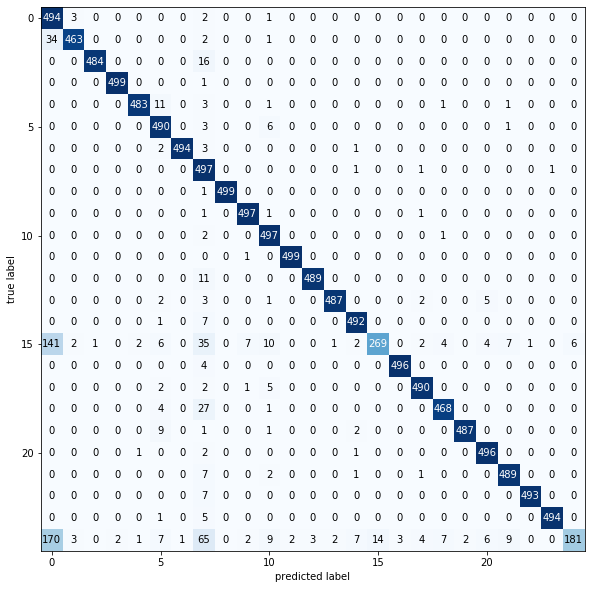

In [9]:
cnt = CountVectorizer()
pipeline = Pipeline([
   ('vectorizer',cnt),  
   ('model',MultinomialNB())
])  

Multinomial_Language_Detection = pipeline.fit(x_train,y_train)
#Naive Bayes Predict
from sklearn.metrics import *
ypred_NaiveBayes = Multinomial_Language_Detection.predict(x_test)
print("Accuracy = ",accuracy_score(y_test,ypred_NaiveBayes)) #accuracy score
#Confusion Matrix
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from matplotlib.pyplot import subplots

cm = confusion_matrix(y_target=y_test, 
                  y_predicted=ypred_NaiveBayes)

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(10,10))

plt.savefig('CM25/NaiveBayes_characters.png')

Accuracy =  0.95856


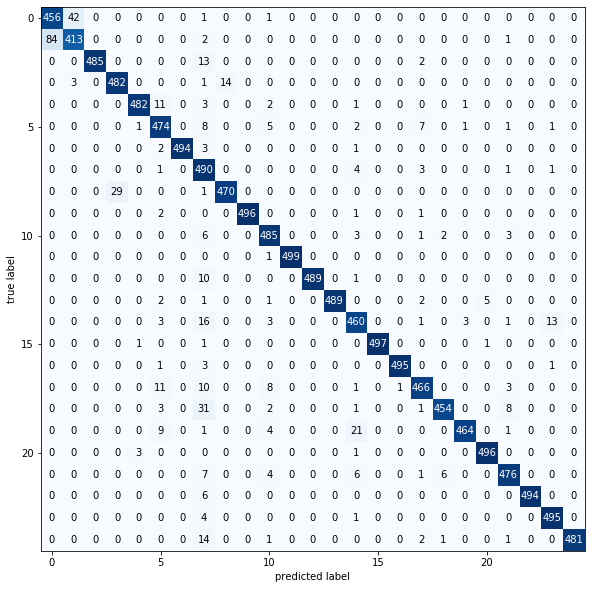

In [10]:
Multinomial_Language_Detection1 = Model_NGram(MultinomialNB,1).fit(x_train,y_train) #Unigram Model
#Naive Bayes N1 Predict
from sklearn.metrics import *
ypred_NaiveBayesN1 = Multinomial_Language_Detection1.predict(x_test)
print("Accuracy = ",accuracy_score(y_test,ypred_NaiveBayesN1)) #accuracy score

#Confusion Matrix
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from matplotlib.pyplot import subplots

cm = confusion_matrix(y_target=y_test, 
                  y_predicted=ypred_NaiveBayesN1)

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(10,10))

plt.savefig('CM25/NaiveBayes_1.png')

Accuracy =  0.97408


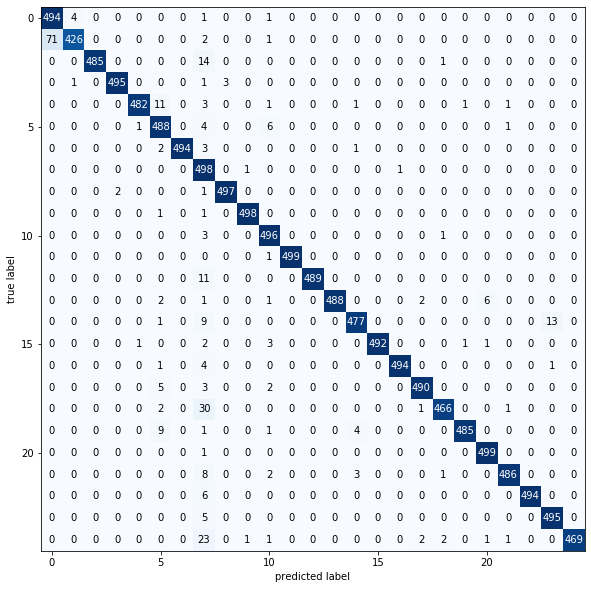

In [11]:
Multinomial_Language_Detection2 = Model_NGram(MultinomialNB,2).fit(x_train,y_train) #Unigram Model
#Naive Bayes N2 Predict
from sklearn.metrics import *
ypred_NaiveBayesN2 = Multinomial_Language_Detection2.predict(x_test)
print("Accuracy = ",accuracy_score(y_test,ypred_NaiveBayesN2)) #accuracy score

#Confusion Matrix
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from matplotlib.pyplot import subplots

cm = confusion_matrix(y_target=y_test, 
                  y_predicted=ypred_NaiveBayesN2)

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(10,10))

plt.savefig('CM25/NaiveBayes_2.png')

Accuracy =  0.97216


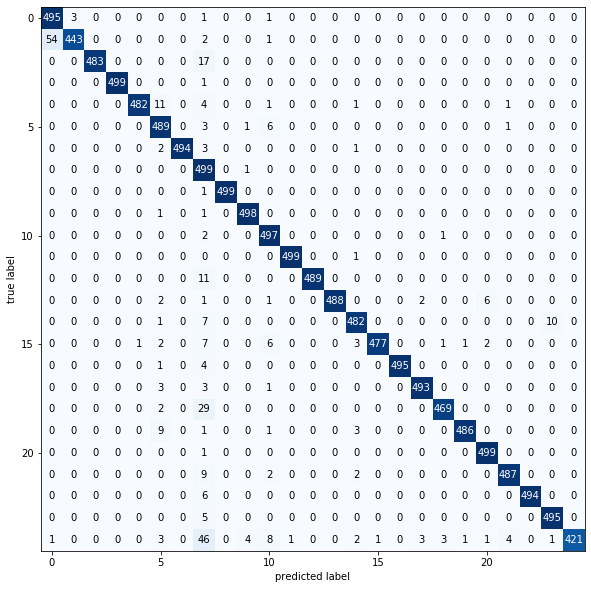

In [12]:
Multinomial_Language_Detection3 = Model_NGram(MultinomialNB,3).fit(x_train,y_train) #Unigram Model
#Naive Bayes N3 Predict
from sklearn.metrics import *
ypred_NaiveBayesN3 = Multinomial_Language_Detection3.predict(x_test)
print("Accuracy = ",accuracy_score(y_test,ypred_NaiveBayesN3)) #accuracy score

#Confusion Matrix
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from matplotlib.pyplot import subplots

cm = confusion_matrix(y_target=y_test, 
                  y_predicted=ypred_NaiveBayesN3)

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(10,10))

plt.savefig('CM25/NaiveBayes_3.png')

Accuracy =  0.97016


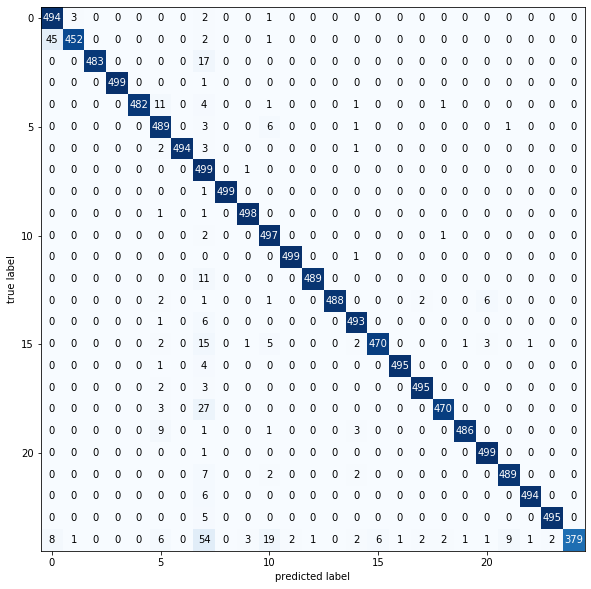

In [13]:
Multinomial_Language_Detection4 = Model_NGram(MultinomialNB,4).fit(x_train,y_train) #Unigram Model
#Naive Bayes N4 Predict
from sklearn.metrics import *
ypred_NaiveBayesN4 = Multinomial_Language_Detection4.predict(x_test)
print("Accuracy = ",accuracy_score(y_test,ypred_NaiveBayesN4)) #accuracy score

#Confusion Matrix
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from matplotlib.pyplot import subplots

cm = confusion_matrix(y_target=y_test, 
                  y_predicted=ypred_NaiveBayesN4)

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(10,10))

plt.savefig('CM25/NaiveBayes_4.png')

Accuracy =  0.96328


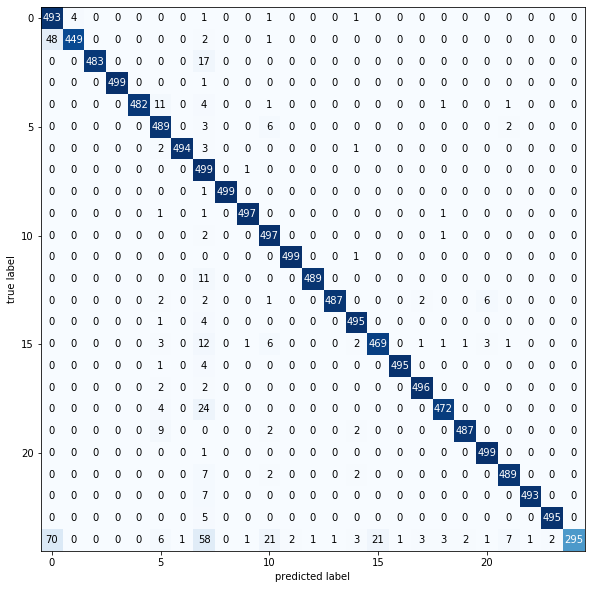

In [14]:
Multinomial_Language_Detection5 = Model_NGram(MultinomialNB,5).fit(x_train,y_train) #Unigram Model
#Naive Bayes N5 Predict
from sklearn.metrics import *
ypred_NaiveBayesN5 = Multinomial_Language_Detection5.predict(x_test)
print("Accuracy = ",accuracy_score(y_test,ypred_NaiveBayesN5)) #accuracy score

#Confusion Matrix
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from matplotlib.pyplot import subplots

cm = confusion_matrix(y_target=y_test, 
                  y_predicted=ypred_NaiveBayesN5)

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(10,10))

plt.savefig('CM25/NaiveBayes_5.png')

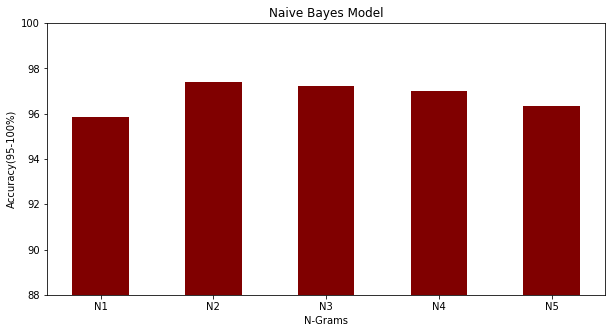

In [15]:
import numpy as np 
import matplotlib.pyplot as plt  
  
   
data = {'N1':accuracy_score(y_test,ypred_NaiveBayesN1)*100, 
        'N2':accuracy_score(y_test,ypred_NaiveBayesN2)*100,
        'N3':accuracy_score(y_test,ypred_NaiveBayesN3)*100,  
        'N4':accuracy_score(y_test,ypred_NaiveBayesN4)*100,
        'N5':accuracy_score(y_test,ypred_NaiveBayesN5)*100} 
courses = list(data.keys()) 
values = list(data.values()) 
   
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(courses, values, color ='maroon',  
        width = 0.5) 
  
plt.xlabel("N-Grams") 
plt.ylabel("Accuracy(95-100%)") 
plt.title("Naive Bayes Model") 
plt.ylim([88,100])
plt.show()

# **Logistic Regression Model**

C:\Users\Mario\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mario\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy =  0.9456


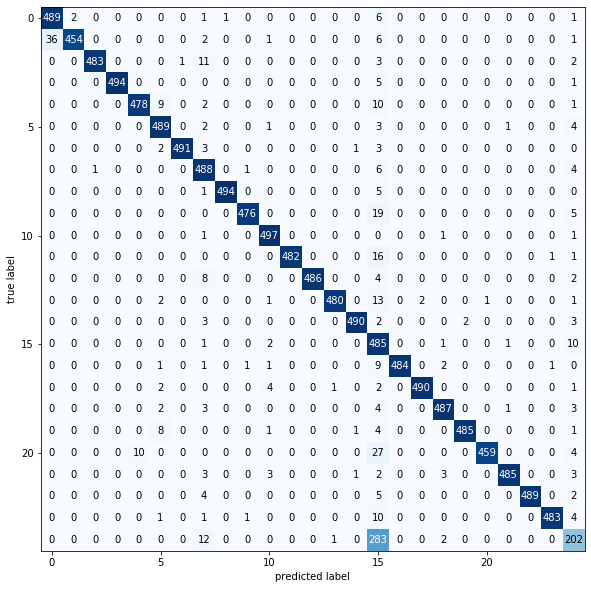

In [16]:
from sklearn.linear_model import LogisticRegression
cnt = CountVectorizer()
pipeline = Pipeline([
   ('vectorizer',cnt),
   ('model',LogisticRegression())
])  
    
LR_Language_Detection = pipeline.fit(x_train,y_train)
#Logistic Regression Predict
from sklearn.metrics import *
ypred_LR = LR_Language_Detection.predict(x_test)
print("Accuracy = ",accuracy_score(y_test,ypred_LR)) #accuracy score

#Confusion Matrix
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from matplotlib.pyplot import subplots

cm = confusion_matrix(y_target=y_test, 
                  y_predicted=ypred_LR)

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(10,10))

plt.savefig('CM25/LR_Language_DetectionCM.png')

C:\Users\Mario\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mario\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy =  0.96744


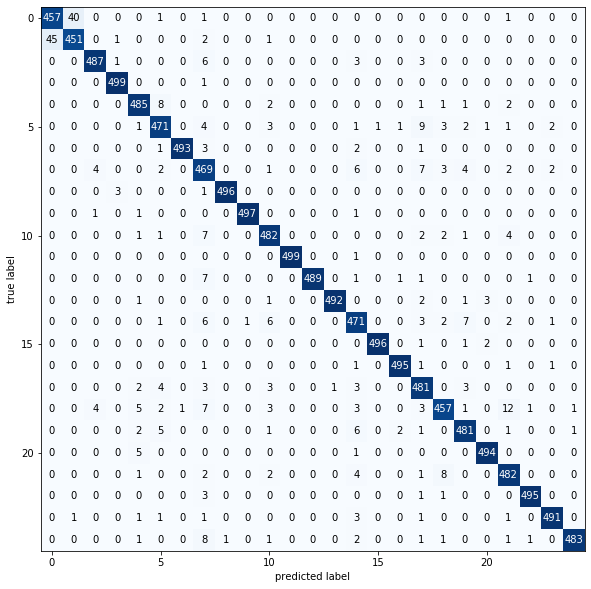

In [17]:


LR_Language_Detection1 = Model_NGram(LogisticRegression,1).fit(x_train,y_train) #Unigram Model
#Logistic Regression N1 Predict
from sklearn.metrics import *
ypred_LRN1 = LR_Language_Detection1.predict(x_test)
print("Accuracy = ",accuracy_score(y_test,ypred_LRN1)) #accuracy score

#Confusion Matrix
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from matplotlib.pyplot import subplots

cm = confusion_matrix(y_target=y_test, 
                  y_predicted=ypred_LRN1)

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(10,10))

plt.savefig('CM25/LR_Language_DetectionCMsmall1.png')

C:\Users\Mario\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mario\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy =  0.98216


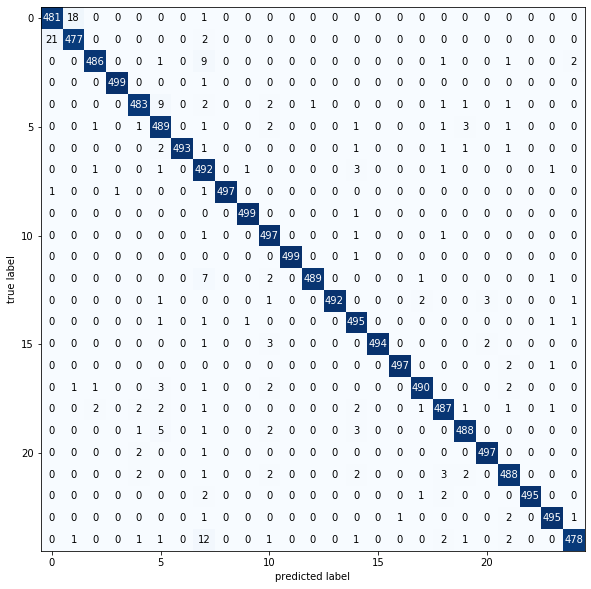

In [18]:
LR_Language_Detection2 = Model_NGram(LogisticRegression,2).fit(x_train,y_train) #Unigram Model
#Logistic Regression N2 Predict
from sklearn.metrics import *
ypred_LRN2 = LR_Language_Detection2.predict(x_test)
print("Accuracy = ",accuracy_score(y_test,ypred_LRN2)) #accuracy score

#Confusion Matrix
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from matplotlib.pyplot import subplots

cm = confusion_matrix(y_target=y_test, 
                  y_predicted=ypred_LRN2)

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(10,10))

plt.savefig('CM25/LR_Language_DetectionCMsmall2.png')

C:\Users\Mario\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mario\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy =  0.98464


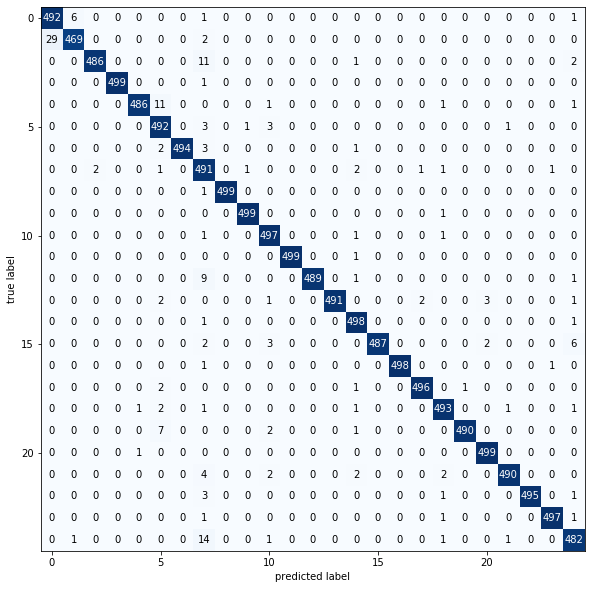

In [19]:
LR_Language_Detection3 = Model_NGram(LogisticRegression,3).fit(x_train,y_train) #Unigram Model
#Logistic Regression N3 Predict
from sklearn.metrics import *
ypred_LRN3 = LR_Language_Detection3.predict(x_test)
print("Accuracy = ",accuracy_score(y_test,ypred_LRN3)) #accuracy score

#Confusion Matrix
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from matplotlib.pyplot import subplots

cm = confusion_matrix(y_target=y_test, 
                  y_predicted=ypred_LRN3)

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(10,10))

plt.savefig('CM25/LR_Language_DetectionCMsmall3.png')

C:\Users\Mario\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mario\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy =  0.98264


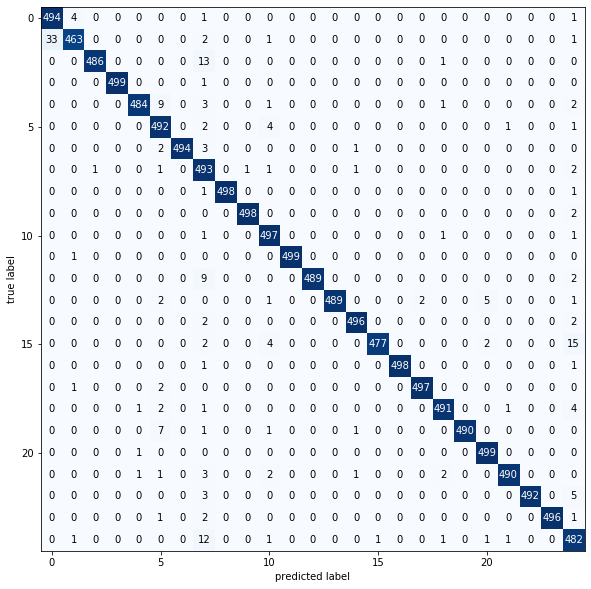

In [20]:
LR_Language_Detection4 = Model_NGram(LogisticRegression,4).fit(x_train,y_train) #Unigram Model
#Logistic Regression N4 Predict
from sklearn.metrics import *
ypred_LRN4 = LR_Language_Detection4.predict(x_test)
print("Accuracy = ",accuracy_score(y_test,ypred_LRN4)) #accuracy score

#Confusion Matrix
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from matplotlib.pyplot import subplots

cm = confusion_matrix(y_target=y_test, 
                  y_predicted=ypred_LRN4)

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(10,10))

plt.savefig('CM25/LR_Language_DetectionCMsmall4.png')

C:\Users\Mario\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mario\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy =  0.9792


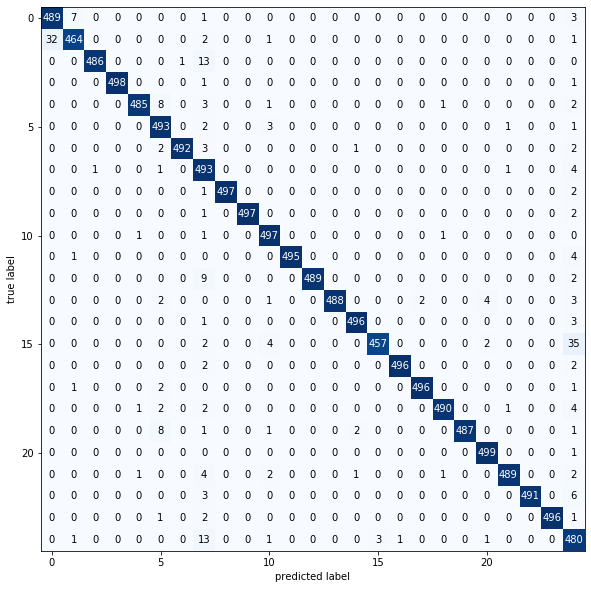

In [21]:
LR_Language_Detection5 = Model_NGram(LogisticRegression,5).fit(x_train,y_train) #Unigram Model
#Logistic Regression N5 Predict
from sklearn.metrics import *
ypred_LRN5 = LR_Language_Detection5.predict(x_test)
print("Accuracy = ",accuracy_score(y_test,ypred_LRN5)) #accuracy score

#Confusion Matrix
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from matplotlib.pyplot import subplots

cm = confusion_matrix(y_target=y_test, 
                  y_predicted=ypred_LRN5)

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(10,10))

plt.savefig('CM25/LR_Language_DetectionCMsmall5.png')

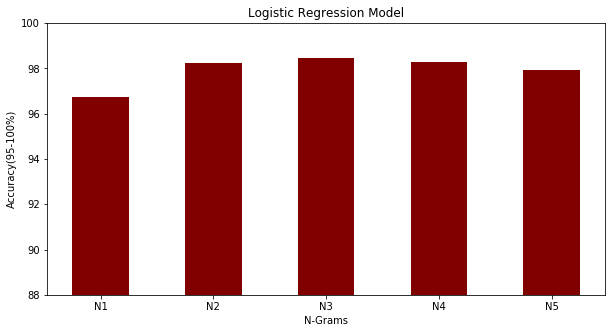

In [22]:
data = {'N1':accuracy_score(y_test,ypred_LRN1)*100, 
        'N2':accuracy_score(y_test,ypred_LRN2)*100,
        'N3':accuracy_score(y_test,ypred_LRN3)*100,  
        'N4':accuracy_score(y_test,ypred_LRN4)*100,
        'N5':accuracy_score(y_test,ypred_LRN5)*100} 
courses = list(data.keys()) 
values = list(data.values()) 
   
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(courses, values, color ='maroon',  
        width = 0.5) 
  
plt.xlabel("N-Grams") 
plt.ylabel("Accuracy(95-100%)") 
plt.title("Logistic Regression Model") 
plt.ylim([88,100])
plt.show()

# **Random Forest Classifier Model**

C:\Users\Mario\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy =  0.9456


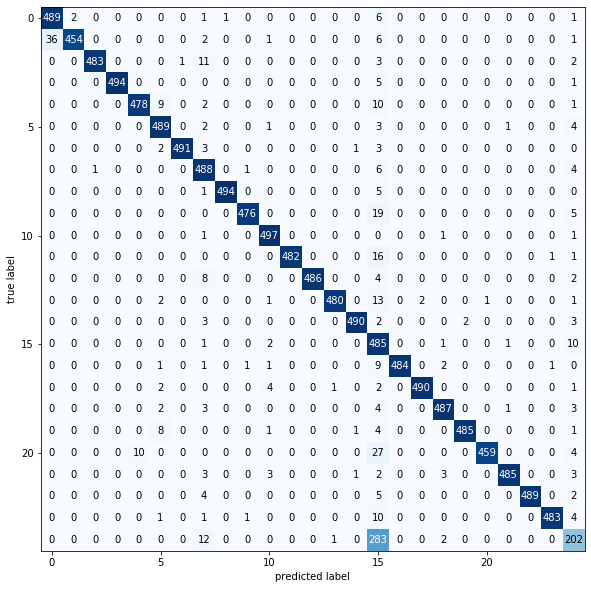

In [23]:
from sklearn.ensemble           import RandomForestClassifier
cnt = CountVectorizer()
pipeline = Pipeline([
   ('vectorizer',cnt),
   ('model',RandomForestClassifier())
])  
    
RF_Language_Detection = pipeline.fit(x_train,y_train)
#Random Forest Predict
from sklearn.metrics import *
ypred_RF = LR_Language_Detection.predict(x_test)
print("Accuracy = ",accuracy_score(y_test,ypred_RF)) #accuracy score

#Confusion Matrix
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from matplotlib.pyplot import subplots

cm = confusion_matrix(y_target=y_test, 
                  y_predicted=ypred_RF)

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(10,10))

plt.savefig('CM25/RF_Language_DetectionCM00.png')

C:\Users\Mario\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy =  0.92608


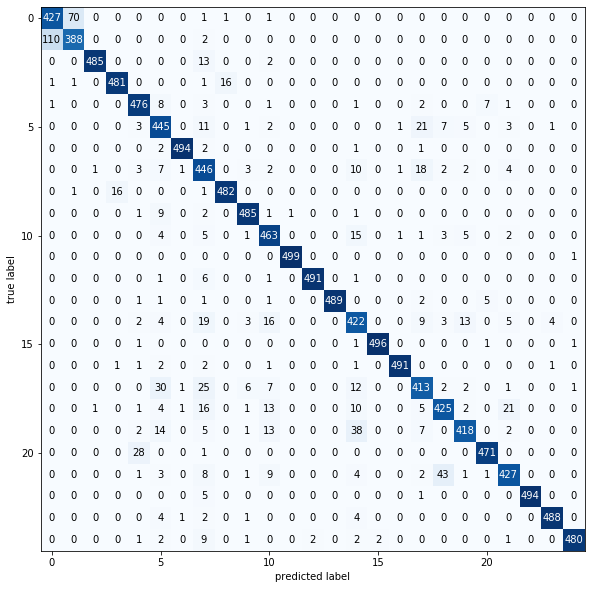

In [24]:


RF_Language_Detection1 = Model_NGram(RandomForestClassifier,1).fit(x_train,y_train) #Unigram Model
#Random Forest N1 Predict
from sklearn.metrics import *
ypred_RFN1 = RF_Language_Detection1.predict(x_test)
print("Accuracy = ",accuracy_score(y_test,ypred_RFN1)) #accuracy score

#Confusion Matrix
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from matplotlib.pyplot import subplots

cm = confusion_matrix(y_target=y_test, 
                  y_predicted=ypred_RFN1)

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(10,10))

plt.savefig('CM25/RF_Language_DetectionCMsmall1.png')

C:\Users\Mario\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy =  0.93512


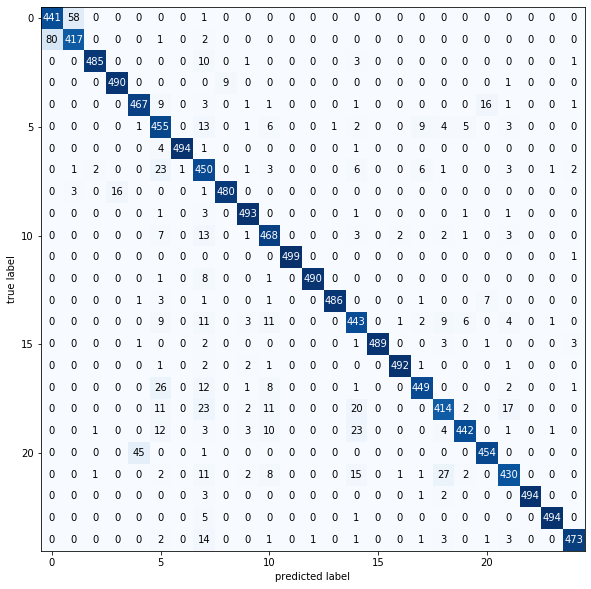

In [25]:
RF_Language_Detection2 = Model_NGram(RandomForestClassifier,2).fit(x_train,y_train) #Unigram Model
#Random Forest N2 Predict
from sklearn.metrics import *
ypred_RFN2 = RF_Language_Detection2.predict(x_test)
print("Accuracy = ",accuracy_score(y_test,ypred_RFN2)) #accuracy score

#Confusion Matrix
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from matplotlib.pyplot import subplots

cm = confusion_matrix(y_target=y_test, 
                  y_predicted=ypred_RFN2)

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(10,10))

plt.savefig('CM25/RF_Language_DetectionCMsmall2.png')

C:\Users\Mario\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy =  0.9576


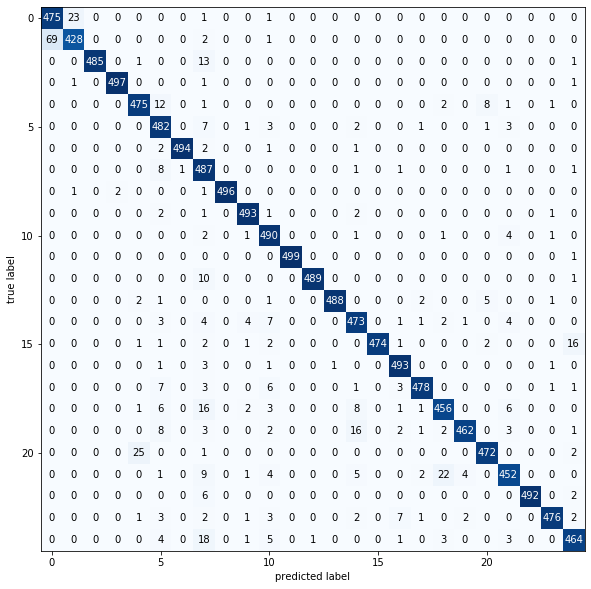

In [26]:
RF_Language_Detection3 = Model_NGram(RandomForestClassifier,3).fit(x_train,y_train) #Unigram Model
#Random Forest N3 Predict
from sklearn.metrics import *
ypred_RFN3 = RF_Language_Detection3.predict(x_test)
print("Accuracy = ",accuracy_score(y_test,ypred_RFN3)) #accuracy score

#Confusion Matrix
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from matplotlib.pyplot import subplots

cm = confusion_matrix(y_target=y_test, 
                  y_predicted=ypred_RFN3)

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(10,10))

plt.savefig('CM25/RF_Language_DetectionCMsmall3.png')

C:\Users\Mario\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy =  0.95608


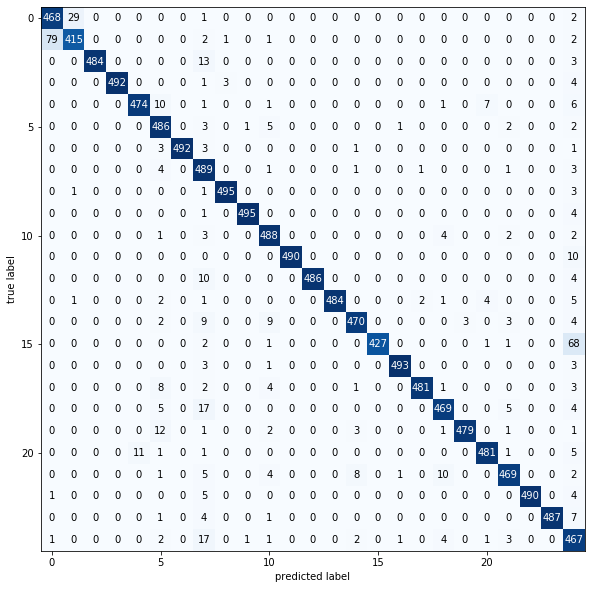

In [27]:
RF_Language_Detection4 = Model_NGram(RandomForestClassifier,4).fit(x_train,y_train) #Unigram Model
#Random Forest N4 Predict
from sklearn.metrics import *
ypred_RFN4 = RF_Language_Detection4.predict(x_test)
print("Accuracy = ",accuracy_score(y_test,ypred_RFN4)) #accuracy score

#Confusion Matrix
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from matplotlib.pyplot import subplots

cm = confusion_matrix(y_target=y_test, 
                  y_predicted=ypred_RFN4)

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(10,10))

plt.savefig('CM25/RF_Language_DetectionCMsmall4.png')

C:\Users\Mario\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy =  0.94024


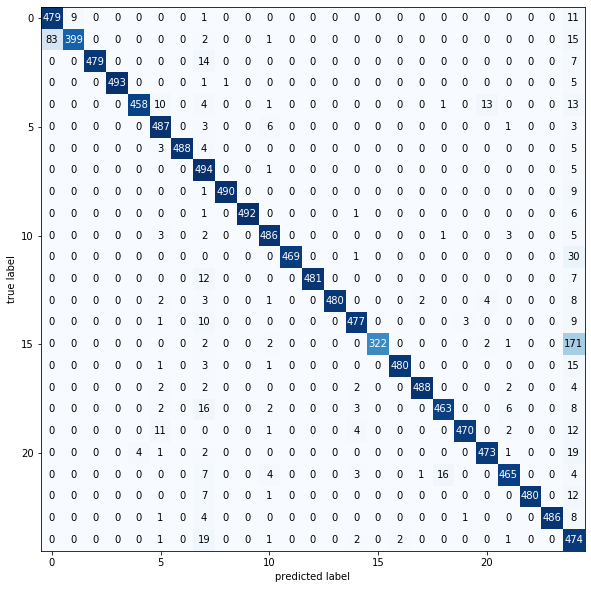

In [28]:
RF_Language_Detection5 = Model_NGram(RandomForestClassifier,5).fit(x_train,y_train) #Unigram Model
#Random Forest N5 Predict
from sklearn.metrics import *
ypred_RFN5 = RF_Language_Detection5.predict(x_test)
print("Accuracy = ",accuracy_score(y_test,ypred_RFN5)) #accuracy score

#Confusion Matrix
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from matplotlib.pyplot import subplots

cm = confusion_matrix(y_target=y_test, 
                  y_predicted=ypred_RFN5)

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(10,10))

plt.savefig('CM25/RF_Language_DetectionCMsmall5.png')

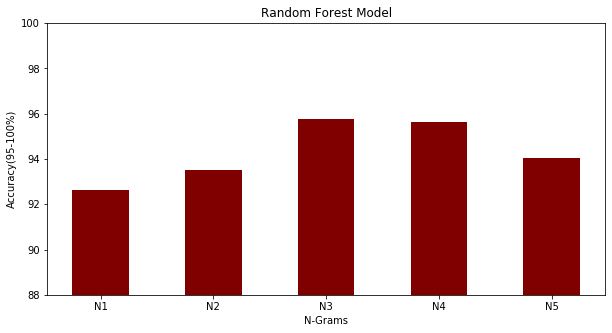

In [29]:
data = {'N1':accuracy_score(y_test,ypred_RFN1)*100, 
        'N2':accuracy_score(y_test,ypred_RFN2)*100,
        'N3':accuracy_score(y_test,ypred_RFN3)*100,  
        'N4':accuracy_score(y_test,ypred_RFN4)*100,
        'N5':accuracy_score(y_test,ypred_RFN5)*100} 
courses = list(data.keys()) 
values = list(data.values()) 
   
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(courses, values, color ='maroon',  
        width = 0.5) 
  
plt.xlabel("N-Grams") 
plt.ylabel("Accuracy(95-100%)") 
plt.title("Random Forest Model") 
plt.ylim([88,100])
plt.show()

# **Decision Tree Classifier Model**

Accuracy =  0.90016


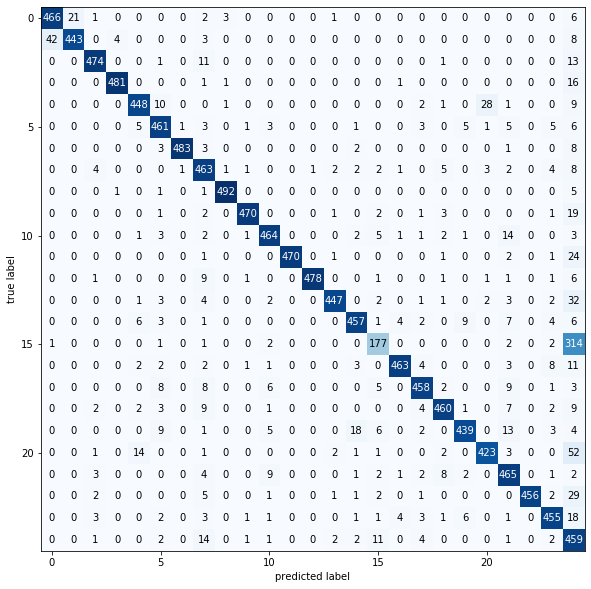

In [30]:
from sklearn.tree            import DecisionTreeClassifier
cnt = CountVectorizer()
pipeline = Pipeline([
   ('vectorizer',cnt),
   ('model',DecisionTreeClassifier())
]) 
    
DT_Language_Detection = pipeline.fit(x_train,y_train)
#Naive Bayes Predict
from sklearn.metrics import *
ypred_DT = DT_Language_Detection.predict(x_test)
print("Accuracy = ",accuracy_score(y_test,ypred_DT)) #accuracy score

#Confusion Matrix
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from matplotlib.pyplot import subplots

cm = confusion_matrix(y_target=y_test, 
                  y_predicted=ypred_DT)

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(10,10))

plt.savefig('CM25/DT_Language_DetectionCM00.png')

Accuracy =  0.90568


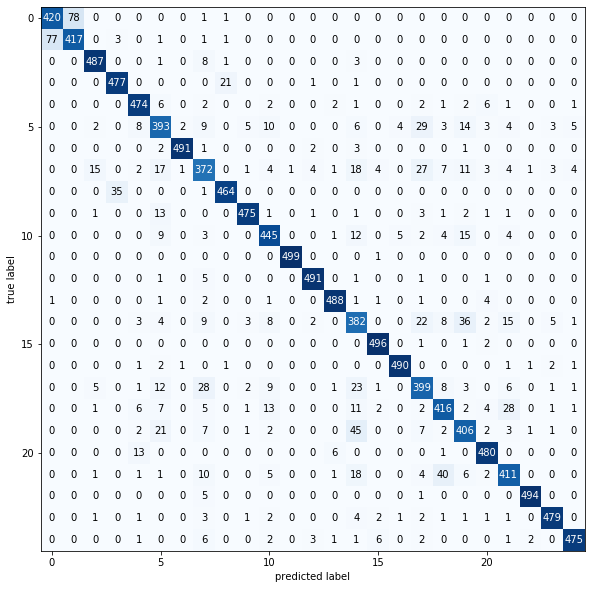

In [31]:

DT_Language_Detection1 = Model_NGram(DecisionTreeClassifier,1).fit(x_train,y_train)#Unigram
#Decision Tree N1 Predict
from sklearn.metrics import *
ypred = DT_Language_Detection1.predict(x_test)
print("Accuracy = ",accuracy_score(y_test,ypred)) #accuracy score

#Confusion Matrix
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from matplotlib.pyplot import subplots

cm = confusion_matrix(y_target=y_test, 
                  y_predicted=ypred)

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(10,10))

plt.savefig('CM25/DT_Language_DetectionCMsmall1.png')

Accuracy =  0.92296


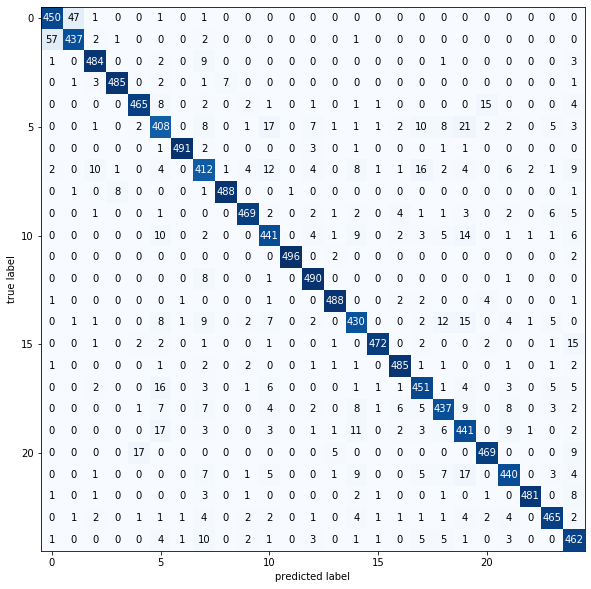

In [32]:
DT_Language_Detection2 = Model_NGram(DecisionTreeClassifier,2).fit(x_train,y_train)#Unigram
#Decision Tree N2 Predict
from sklearn.metrics import *
DT_ypred2 = DT_Language_Detection2.predict(x_test)
print("Accuracy = ",accuracy_score(y_test,DT_ypred2)) #accuracy score

#Confusion Matrix
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from matplotlib.pyplot import subplots

cm = confusion_matrix(y_target=y_test, 
                  y_predicted=DT_ypred2)

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(10,10))

plt.savefig('CM25/DT_Language_DetectionCMsmall2.png')

Accuracy =  0.91384


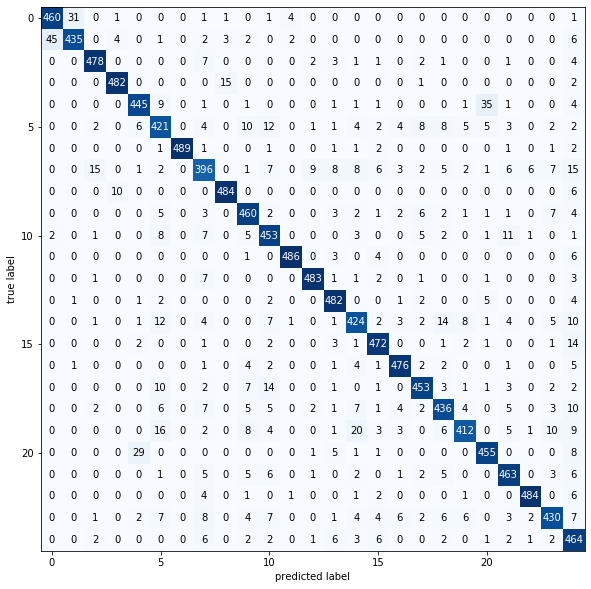

In [33]:
DT_Language_Detection3 = Model_NGram(DecisionTreeClassifier,3).fit(x_train,y_train)#Unigram
#Decision Tree N3 Predict
from sklearn.metrics import *
DT_ypred3 = DT_Language_Detection3.predict(x_test)
print("Accuracy = ",accuracy_score(y_test,DT_ypred3)) #accuracy score

#Confusion Matrix
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from matplotlib.pyplot import subplots

cm = confusion_matrix(y_target=y_test, 
                  y_predicted=DT_ypred3)

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(10,10))

plt.savefig('CM25/DT_Language_DetectionCMsmall3.png')

Accuracy =  0.91768


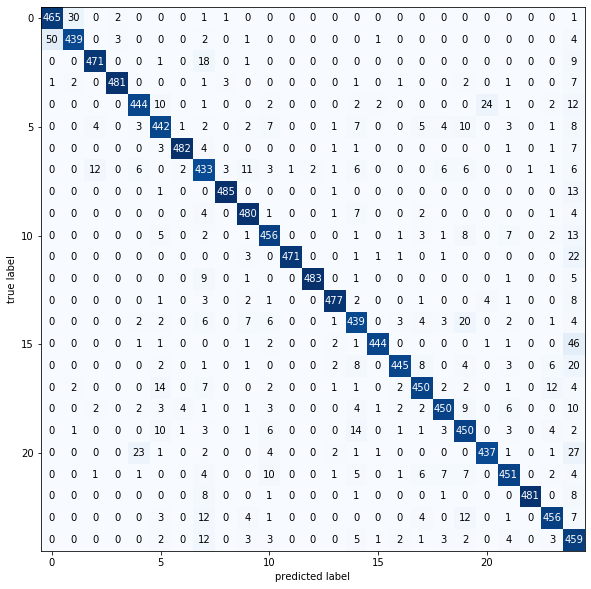

In [34]:
DT_Language_Detection4 = Model_NGram(DecisionTreeClassifier,4).fit(x_train,y_train)#Unigram
#Decision Tree N4 Predict
from sklearn.metrics import *
DT_ypred4 = DT_Language_Detection4.predict(x_test)
print("Accuracy = ",accuracy_score(y_test,DT_ypred4)) #accuracy score

#Confusion Matrix
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from matplotlib.pyplot import subplots

cm = confusion_matrix(y_target=y_test, 
                  y_predicted=DT_ypred4)

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(10,10))

plt.savefig('CM25/DT_Language_DetectionCMsmall4.png')

Accuracy =  0.89944


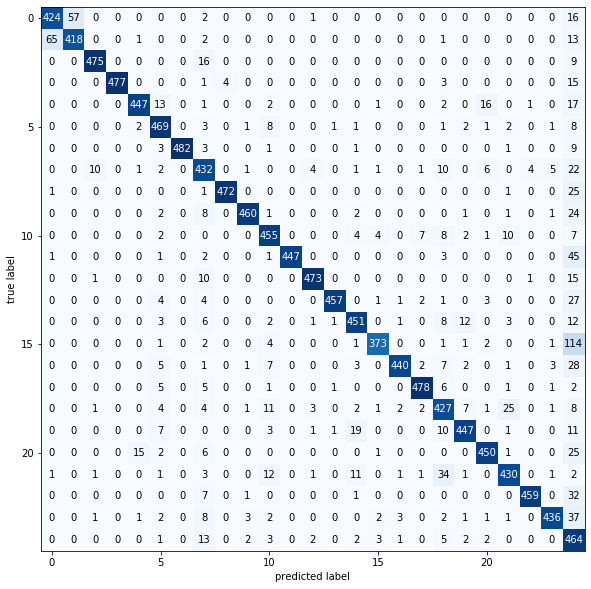

In [35]:
DT_Language_Detection5 = Model_NGram(DecisionTreeClassifier,5).fit(x_train,y_train)#Unigram
#Decision Tree N5 Predict
from sklearn.metrics import *
DT_ypred5 = DT_Language_Detection5.predict(x_test)
print("Accuracy = ",accuracy_score(y_test,DT_ypred5)) #accuracy score

#Confusion Matrix
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from matplotlib.pyplot import subplots

cm = confusion_matrix(y_target=y_test, 
                  y_predicted=DT_ypred5)

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(10,10))

plt.savefig('CM25/DT_Language_DetectionCMsmall5.png')

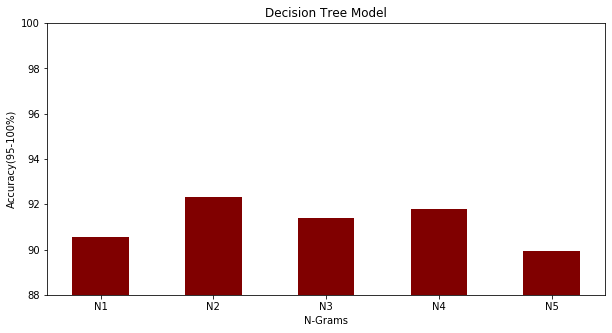

In [36]:
data = {'N1':accuracy_score(y_test,ypred)*100, 
        'N2':accuracy_score(y_test,DT_ypred2)*100,
        'N3':accuracy_score(y_test,DT_ypred3)*100,  
        'N4':accuracy_score(y_test,DT_ypred4)*100,
        'N5':accuracy_score(y_test,DT_ypred5)*100} 
courses = list(data.keys()) 
values = list(data.values()) 
   
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(courses, values, color ='maroon',  
        width = 0.5) 
  
plt.xlabel("N-Grams") 
plt.ylabel("Accuracy(95-100%)") 
plt.title("Decision Tree Model") 
plt.ylim([88,100])
plt.show()

In [37]:
import os
files = os.listdir('CM25')

In [38]:
files.sort()
print(files)

['DT_Language_DetectionCM00.png', 'DT_Language_DetectionCMsmall1.png', 'DT_Language_DetectionCMsmall2.png', 'DT_Language_DetectionCMsmall3.png', 'DT_Language_DetectionCMsmall4.png', 'DT_Language_DetectionCMsmall5.png', 'LR_Language_DetectionCM.png', 'LR_Language_DetectionCMsmall1.png', 'LR_Language_DetectionCMsmall2.png', 'LR_Language_DetectionCMsmall3.png', 'LR_Language_DetectionCMsmall4.png', 'LR_Language_DetectionCMsmall5.png', 'Multinomial_Language_DetectionCMcharacters.png', 'Multinomial_Language_DetectionCMsmall.png', 'Multinomial_Language_DetectionCMsmall2.png', 'Multinomial_Language_DetectionCMsmall3.png', 'Multinomial_Language_DetectionCMsmall4.png', 'Multinomial_Language_DetectionCMsmall5.png', 'NaiveBayes_1.png', 'NaiveBayes_2.png', 'NaiveBayes_3.png', 'NaiveBayes_4.png', 'NaiveBayes_5.png', 'NaiveBayes_characters.png', 'RF_Language_DetectionCM00.png', 'RF_Language_DetectionCMsmall1.png', 'RF_Language_DetectionCMsmall2.png', 'RF_Language_DetectionCMsmall3.png', 'RF_Language_

In [39]:
filenames = ['CM25\{}'.format(i) for i in files]
print(filenames)
xs = []
filez = []
for i in filenames:
    filez.append(i.replace('Language_Detection','').replace('Multinomial','NB'))


['CM25\\DT_Language_DetectionCM00.png', 'CM25\\DT_Language_DetectionCMsmall1.png', 'CM25\\DT_Language_DetectionCMsmall2.png', 'CM25\\DT_Language_DetectionCMsmall3.png', 'CM25\\DT_Language_DetectionCMsmall4.png', 'CM25\\DT_Language_DetectionCMsmall5.png', 'CM25\\LR_Language_DetectionCM.png', 'CM25\\LR_Language_DetectionCMsmall1.png', 'CM25\\LR_Language_DetectionCMsmall2.png', 'CM25\\LR_Language_DetectionCMsmall3.png', 'CM25\\LR_Language_DetectionCMsmall4.png', 'CM25\\LR_Language_DetectionCMsmall5.png', 'CM25\\Multinomial_Language_DetectionCMcharacters.png', 'CM25\\Multinomial_Language_DetectionCMsmall.png', 'CM25\\Multinomial_Language_DetectionCMsmall2.png', 'CM25\\Multinomial_Language_DetectionCMsmall3.png', 'CM25\\Multinomial_Language_DetectionCMsmall4.png', 'CM25\\Multinomial_Language_DetectionCMsmall5.png', 'CM25\\NaiveBayes_1.png', 'CM25\\NaiveBayes_2.png', 'CM25\\NaiveBayes_3.png', 'CM25\\NaiveBayes_4.png', 'CM25\\NaiveBayes_5.png', 'CM25\\NaiveBayes_characters.png', 'CM25\\RF_Lan

					Evaluation Confusion Matrices:


C:\Users\Mario\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


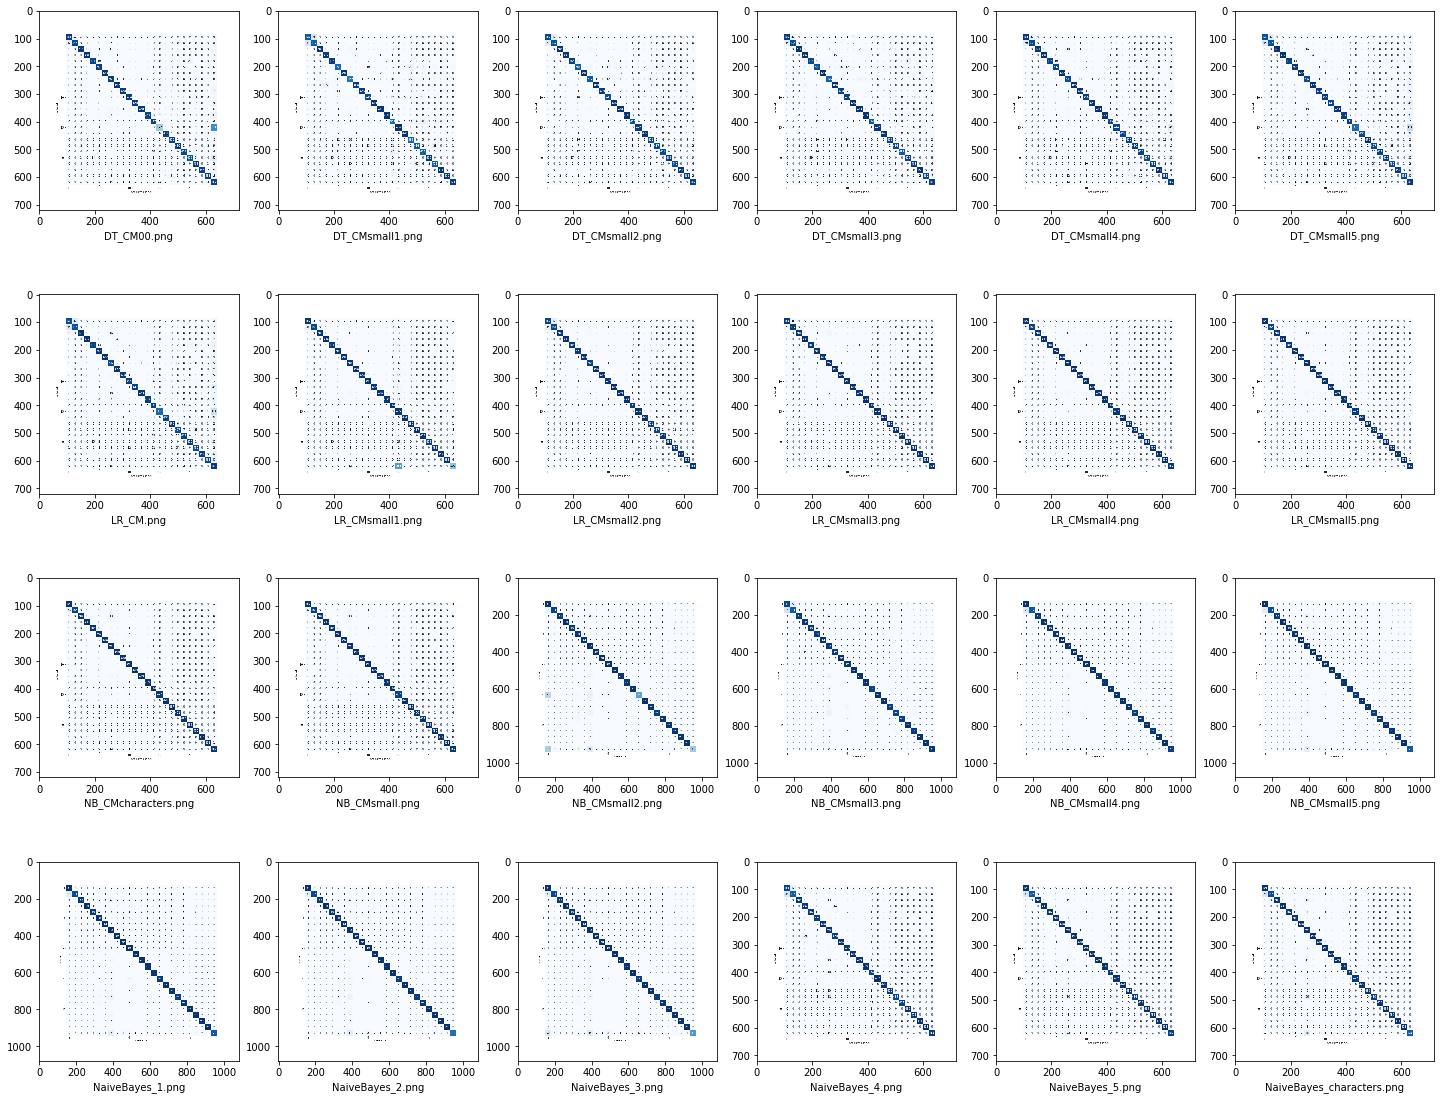

In [40]:
import matplotlib.pyplot as plt
from PIL import Image

print("\t\t\t\t\tEvaluation Confusion Matrices:")

fig,ax = plt.subplots(4,6)
fig.set_size_inches(25, 20)

for i in range(4):
    for x in range(6):
        #xs.append(filenames[(i*5)+(x)])
        with open(filenames[(i*5)+(x)],'rb') as f:
            image = Image.open(f)
            ax[i][x].imshow(image)
            ax[i][x].set_xlabel(filez[(i*6)+(x)].replace('CM25\\',''))

fig.show()

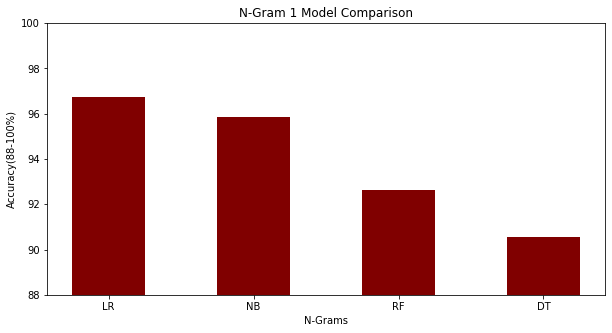

In [41]:
data = {'LR':accuracy_score(y_test,ypred_LRN1)*100, 
        'NB':accuracy_score(y_test,ypred_NaiveBayesN1)*100,
        'RF':accuracy_score(y_test,ypred_RFN1)*100,  
        'DT':accuracy_score(y_test,ypred)*100} 
courses = list(data.keys()) 
values = list(data.values()) 
   
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(courses, values, color ='maroon',  
        width = 0.5) 
  
plt.xlabel("N-Grams") 
plt.ylabel("Accuracy(88-100%)") 
plt.title("N-Gram 1 Model Comparison") 
plt.ylim([88,100])
plt.show()

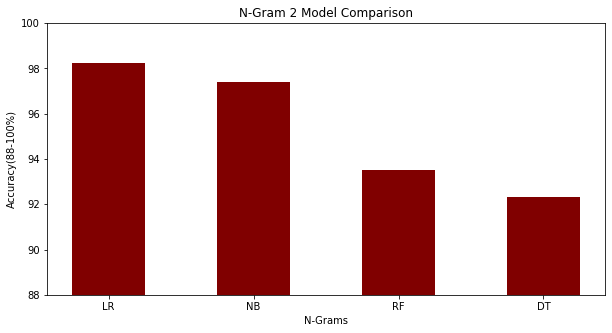

In [42]:
data = {'LR':accuracy_score(y_test,ypred_LRN2)*100, 
        'NB':accuracy_score(y_test,ypred_NaiveBayesN2)*100,
        'RF':accuracy_score(y_test,ypred_RFN2)*100,  
        'DT':accuracy_score(y_test,DT_ypred2)*100} 
courses = list(data.keys()) 
values = list(data.values()) 
   
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(courses, values, color ='maroon',  
        width = 0.5) 
  
plt.xlabel("N-Grams") 
plt.ylabel("Accuracy(88-100%)") 
plt.title("N-Gram 2 Model Comparison") 
plt.ylim([88,100])
plt.show()

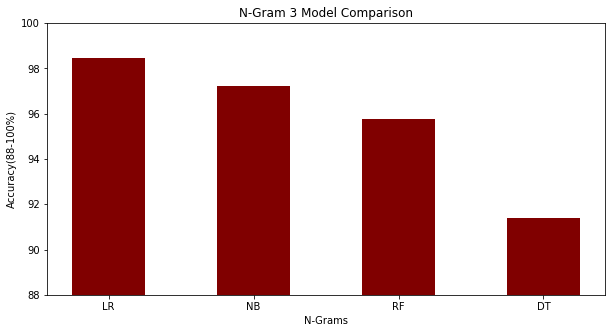

In [43]:
data = {'LR':accuracy_score(y_test,ypred_LRN3)*100, 
        'NB':accuracy_score(y_test,ypred_NaiveBayesN3)*100,
        'RF':accuracy_score(y_test,ypred_RFN3)*100,  
        'DT':accuracy_score(y_test,DT_ypred3)*100} 
courses = list(data.keys()) 
values = list(data.values()) 
   
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(courses, values, color ='maroon',  
        width = 0.5) 
  
plt.xlabel("N-Grams") 
plt.ylabel("Accuracy(88-100%)") 
plt.title("N-Gram 3 Model Comparison") 
plt.ylim([88,100])
plt.show()

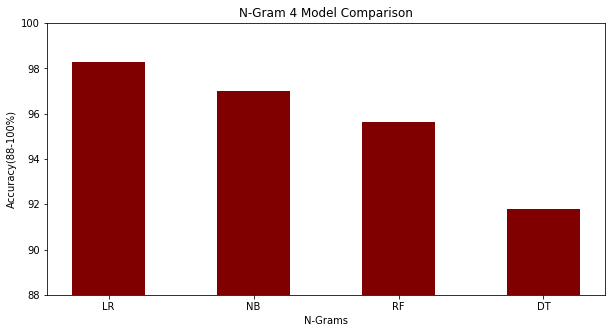

In [44]:
data = {'LR':accuracy_score(y_test,ypred_LRN4)*100, 
        'NB':accuracy_score(y_test,ypred_NaiveBayesN4)*100,
        'RF':accuracy_score(y_test,ypred_RFN4)*100,  
        'DT':accuracy_score(y_test,DT_ypred4)*100} 
courses = list(data.keys()) 
values = list(data.values()) 
   
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(courses, values, color ='maroon',  
        width = 0.5) 
  
plt.xlabel("N-Grams") 
plt.ylabel("Accuracy(88-100%)") 
plt.title("N-Gram 4 Model Comparison") 
plt.ylim([88,100])
plt.show()

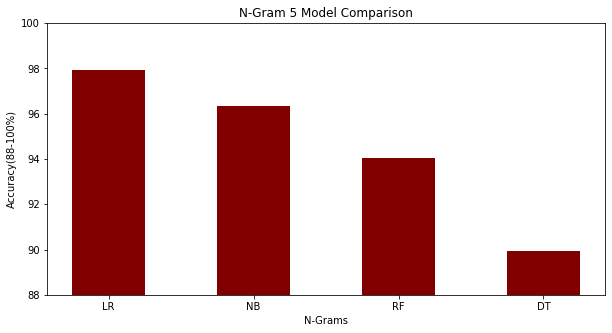

In [45]:
data = {'LR':accuracy_score(y_test,ypred_LRN5)*100, 
        'NB':accuracy_score(y_test,ypred_NaiveBayesN5)*100,
        'RF':accuracy_score(y_test,ypred_RFN5)*100,  
        'DT':accuracy_score(y_test,DT_ypred5)*100} 
courses = list(data.keys()) 
values = list(data.values()) 
   
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(courses, values, color ='maroon',  
        width = 0.5) 
  
plt.xlabel("N-Grams") 
plt.ylabel("Accuracy(88-100%)") 
plt.title("N-Gram 5 Model Comparison") 
plt.ylim([88,100])
plt.show()

# **Model performance**

Our best model was the Logistic Regression at the N-Gram of 3 on the 25 Languages that are as follows.

In [77]:
print(classification_report(y_test,ypred_LRN3))

              precision    recall  f1-score   support

         ara       0.94      0.98      0.96       500
         arz       0.99      0.94      0.96       500
         asm       1.00      0.97      0.98       500
         azb       1.00      1.00      1.00       500
         bul       1.00      0.97      0.98       500
         deu       0.95      0.98      0.97       500
         ell       1.00      0.99      0.99       500
         eng       0.89      0.98      0.94       500
         fas       1.00      1.00      1.00       500
         fin       1.00      1.00      1.00       500
         fra       0.97      0.99      0.98       500
         heb       1.00      1.00      1.00       500
         hin       1.00      0.98      0.99       500
         hye       1.00      0.98      0.99       500
         ita       0.98      1.00      0.99       500
         jpn       1.00      0.97      0.99       500
         kur       1.00      1.00      1.00       500
         nld       0.99    

With the Confusion Matrix as follows:

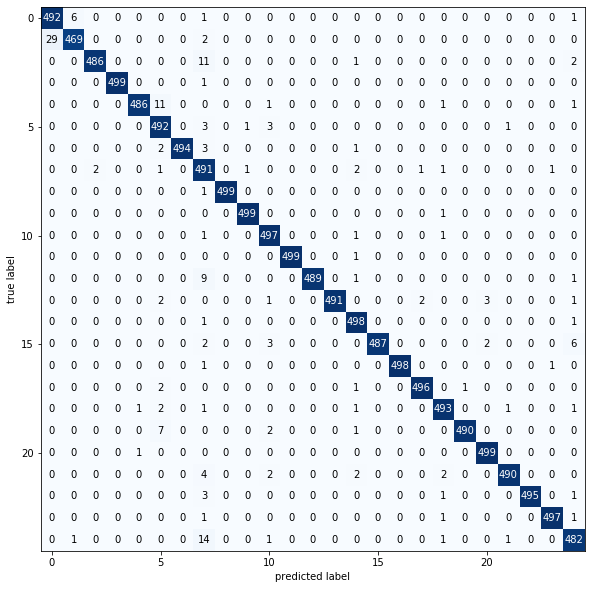

In [84]:
cm = confusion_matrix(y_target=y_test, 
                  y_predicted=ypred_LRN3)

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(10,10))

In [66]:
#Enter a sentence in this variable to test it.
string = ["لذلك كنت أعمل مع نماذج التعلم الآلي الجديدة هذه وكان اختبارها ممتعًا حقًا"]
result = LR_Language_Detection1.predict(string)

print(string)
print("This Language is: ",classes_names[classes.index(result)])


['لذلك كنت أعمل مع نماذج التعلم الآلي الجديدة هذه وكان اختبارها ممتعًا حقًا']
This Language is:  Arabic


In [76]:
#Enter a sentence in this variable to test it.
string = ["صلاح الدين راح بجيشه على الرمله و استنى هناك عشان يشوف ريتشارد ناوى على إيه. الصليبيين راحوا على يافا و حصنوها ، و ابتدا ريتشارد يجهز للوصول للقدس."]
result = LR_Language_Detection1.predict(string)

print(string)
print("This Language is: ",classes_names[classes.index(result)])

['صلاح الدين راح بجيشه على الرمله و استنى هناك عشان يشوف ريتشارد ناوى على إيه. الصليبيين راحوا على يافا و حصنوها ، و ابتدا ريتشارد يجهز للوصول للقدس.']
This Language is:  Egyptian Arabic


In [67]:
#Enter a sentence in this variable to test it.
string = ["So I've been working around with these new machine learning models and it has been really fun to test it"]
result = LR_Language_Detection1.predict(string)

print(string)
print("This Language is: ",classes_names[classes.index(result)])


["So I've been working around with these new machine learning models and it has been really fun to test it"]
This Language is:  English


In [68]:
#Enter a sentence in this variable to test it.
string = ["所以我一直在研究这些新的机器学习模型，测试它真的很有趣"]
result = LR_Language_Detection1.predict(string)

print(string)
print("This Language is: ",classes_names[classes.index(result)])


['所以我一直在研究这些新的机器学习模型，测试它真的很有趣']
This Language is:  Wu Chineese


In [71]:
#Enter a sentence in this variable to test it.
string = ["だから私はこれらの新しい機械学習モデルを使って作業していて、それをテストするのは本当に楽しかったです"]
result = LR_Language_Detection1.predict(string)

print(string)
print("This Language is: ",classes_names[classes.index(result)])


['だから私はこれらの新しい機械学習モデルを使って作業していて、それをテストするのは本当に楽しかったです']
This Language is:  Japanese


In [69]:
#Enter a sentence in this variable to test it.
string = ["Итак, я работал с этими новыми моделями машинного обучения, и было очень интересно их протестировать."]
result = LR_Language_Detection1.predict(string)

print(string)
print("This Language is: ",classes_names[classes.index(result)])


['Итак, я работал с этими новыми моделями машинного обучения, и было очень интересно их протестировать.']
This Language is:  Russian


In [70]:
#Enter a sentence in this variable to test it.
string = ["Quindi ho lavorato con questi nuovi modelli di machine learning ed è stato davvero divertente provarlo"]
result = LR_Language_Detection1.predict(string)

print(string)
print("This Language is: ",classes_names[classes.index(result)])



['Quindi ho lavorato con questi nuovi modelli di machine learning ed è stato davvero divertente provarlo']
This Language is:  Italian


In [72]:
#Enter a sentence in this variable to test it.
string = ["J'ai donc travaillé avec ces nouveaux modèles d'apprentissage automatique et c'était vraiment amusant de les tester"]
result = LR_Language_Detection1.predict(string)

print(string)
print("This Language is: ",classes_names[classes.index(result)])

["J'ai donc travaillé avec ces nouveaux modèles d'apprentissage automatique et c'était vraiment amusant de les tester"]
This Language is:  French


In [73]:
#Enter a sentence in this variable to test it.
string = ["Bu yeni makine öğrenimi modelleriyle çalışıyorum ve bunu test etmek gerçekten eğlenceliydi"]
result = LR_Language_Detection1.predict(string)

print(string)
print("This Language is: ",classes_names[classes.index(result)])

['Bu yeni makine öğrenimi modelleriyle çalışıyorum ve bunu test etmek gerçekten eğlenceliydi']
This Language is:  Turkish
